In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
dataset=pd.read_csv('manufacturing dataset.csv')
dataset.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
dataset.columns = 'features_'+dataset.columns

In [4]:
dataset.rename(columns = {'features_Time': 'Time'}, inplace=True)
dataset.rename(columns = {'features_Pass/Fail': 'Pass_Fail'}, inplace=True)

In [5]:
dataset.head()

,Time,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,...,features_581,features_582,features_583,features_584,features_585,features_586,features_587,features_588,features_589,Pass_Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
dataset.isnull().sum()

Time             0
features_0       6
features_1       7
features_2      14
features_3      14
                ..
features_586     1
features_587     1
features_588     1
features_589     1
Pass_Fail        0
Length: 592, dtype: int64

In [7]:
df = dataset.iloc[:,1:]
df = df.apply(lambda x:x.fillna(0), axis=0)
# axis=0 - row wise
df2 = dataset.iloc[:,0]
result = pd.concat([df, df2], axis=1).reindex(df.index)
# axis=1

In [8]:
result.isnull().any()

features_0      False
features_1      False
features_2      False
features_3      False
features_4      False
                ...  
features_587    False
features_588    False
features_589    False
Pass_Fail       False
Time            False
Length: 592, dtype: bool

In [9]:
from datetime import datetime
result['year'] = pd.DatetimeIndex(result['Time']).year
result['month'] = pd.DatetimeIndex(result['Time']).month
result['date'] = pd.DatetimeIndex(result['Time']).day
result['week_day'] = pd.DatetimeIndex(result['Time']).weekday
result['start_time'] = pd.DatetimeIndex(result['Time']).time
result['hour'] = pd.DatetimeIndex(result['Time']).hour
result['min'] = pd.DatetimeIndex(result['Time']).minute

<AxesSubplot:ylabel='Pass_Fail'>

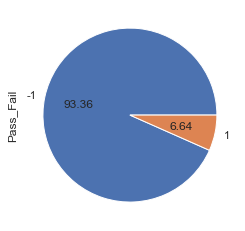

In [10]:
result['Pass_Fail'].value_counts().plot.pie(autopct='%0.2f')

In [11]:
x= result.drop(['Pass_Fail','Time','year','start_time'], axis=1)
y=result['Pass_Fail']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23, random_state=1)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1206, 595), (361, 595), (1206,), (361,))

<AxesSubplot:ylabel='Pass_Fail'>

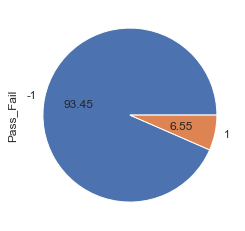

In [14]:
y_train.value_counts().plot.pie(autopct='%.2f')

In [15]:
y_train.value_counts()

-1    1127
 1      79
Name: Pass_Fail, dtype: int64

# Now here our plan is to build model with/without class balancing.

In [16]:
# class balancing

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
rus=RandomUnderSampler(sampling_strategy=1)

In [19]:
x_train_rus,y_train_rus=rus.fit_resample(x_train,y_train)

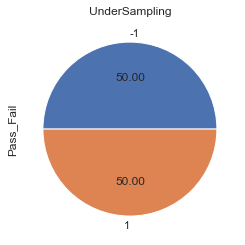

In [20]:
ax=y_train_rus.value_counts().plot.pie(autopct='%.2f')
a=ax.set_title("UnderSampling")

In [21]:
y_train_rus.value_counts()

-1    79
 1    79
Name: Pass_Fail, dtype: int64

In [22]:
# Now go with Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
ros= RandomOverSampler(sampling_strategy='not majority') #String

In [25]:
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

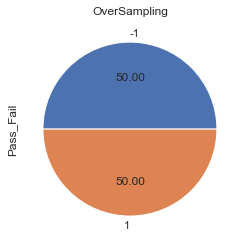

In [26]:
af=y_train_ros.value_counts().plot.pie(autopct='%.2f')
a= af.set_title('OverSampling')

In [27]:
y_train_ros.value_counts()

-1    1127
 1    1127
Name: Pass_Fail, dtype: int64

# Now model building with/without class balancing

In [28]:
# model building without class balancing
from sklearn.ensemble import RandomForestClassifier

rfmodel= RandomForestClassifier(random_state=42)
rfmodel.fit(x_train,y_train)

#training cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv= RandomForestClassifier(random_state=42)
cv_scoring= {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, x_train,y_train,cv=5, scoring=cv_scoring)

# apply the model to make prediction
from sklearn.metrics import matthews_corrcoef
y_train_pred= rfmodel.predict(x_train)
y_test_pred= rfmodel.predict(x_test)

mcc_train= matthews_corrcoef(y_train,y_train_pred)
mcc_test= matthews_corrcoef(y_test, y_test_pred)
mcc_cv= cv['test_MCC'].mean()

#display model performance results
df_labels= pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'],name='Performance_metric_names')
df_values= pd.Series([mcc_train,mcc_cv,mcc_test], name= 'Performance_metric_values')
df1= pd.concat([df_labels,df_values], axis= 1)
df1

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.0
1,MCC_CV,0.0
2,MCC_test,0.0


In [29]:
# model building with undersampled data
from sklearn.ensemble import RandomForestClassifier

rfmodel= RandomForestClassifier(random_state=42)
rfmodel.fit(x_train_rus,y_train_rus)

#training cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv= RandomForestClassifier(random_state=42)
cv_scoring= {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, x_train_rus,y_train_rus,cv=5, scoring=cv_scoring)

# apply the model to make prediction
from sklearn.metrics import matthews_corrcoef
y_train_pred= rfmodel.predict(x_train_rus)
y_test_pred= rfmodel.predict(x_test)

mcc_train= matthews_corrcoef(y_train_rus,y_train_pred)
mcc_test= matthews_corrcoef(y_test, y_test_pred)
mcc_cv= cv['test_MCC'].mean()

#display model performance results
df_labels= pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'],name='Performance_metric_names')
df_values= pd.Series([mcc_train,mcc_cv,mcc_test], name= 'Performance_metric_values')
df2= pd.concat([df_labels,df_values], axis= 1)
df2

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.410047
2,MCC_test,0.193295


In [30]:
# model building with oversampled data
from sklearn.ensemble import RandomForestClassifier

rfmodel= RandomForestClassifier(random_state=42)
rfmodel.fit(x_train_ros,y_train_ros)

#training cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv= RandomForestClassifier(random_state=42)
cv_scoring= {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, x_train_ros,y_train_ros,cv=5, scoring=cv_scoring)

# apply the model to make prediction
from sklearn.metrics import matthews_corrcoef
y_train_pred= rfmodel.predict(x_train_ros)
y_test_pred= rfmodel.predict(x_test)

mcc_train= matthews_corrcoef(y_train_ros,y_train_pred)
mcc_test= matthews_corrcoef(y_test, y_test_pred)
mcc_cv= cv['test_MCC'].mean()

#display model performance results
df_labels= pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'],name='Performance_metric_names')
df_values= pd.Series([mcc_train,mcc_cv,mcc_test], name= 'Performance_metric_values')
df3= pd.concat([df_labels,df_values], axis= 1)
df3

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.0
1,MCC_CV,1.0
2,MCC_test,0.0


In [31]:
# model building without class balancing
from sklearn.ensemble import RandomForestClassifier

rfmodel= RandomForestClassifier(random_state=42,class_weight='balanced')
rfmodel.fit(x_train,y_train)

#training cross-validation Models
from sklearn.metrics import make_scorer, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv= RandomForestClassifier(random_state=42,class_weight='balanced')
cv_scoring= {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, x_train,y_train,cv=5, scoring=cv_scoring)

# apply the model to make prediction
from sklearn.metrics import matthews_corrcoef
y_train_pred= rfmodel.predict(x_train)
y_test_pred= rfmodel.predict(x_test)

mcc_train= matthews_corrcoef(y_train,y_train_pred)
mcc_test= matthews_corrcoef(y_test, y_test_pred)
mcc_cv= cv['test_MCC'].mean()

#display model performance results
df_labels= pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'],name='Performance_metric_names')
df_values= pd.Series([mcc_train,mcc_cv,mcc_test], name= 'Performance_metric_values')
df4= pd.concat([df_labels,df_values], axis= 1)
df4

,Performance_metric_names,Performance_metric_values
0,MCC_train,1.0
1,MCC_CV,0.0
2,MCC_test,0.0


In [ ]:
# Now try with another Dimension Reduction classifiers. bcz we are not able to find which feature is not significant and should
# be removed